## 월요 웹툰 제목 추출

In [8]:
from bs4 import BeautifulSoup as bs 
from pprint import pprint
import requests
import pandas as pd
import numpy as np
link = "https://comic.naver.com/webtoon/weekday.nhn"


res = requests.get(link)

# 파이썬에서 쉽게 분석할 수 있도록 파싱 작업 
soup = bs(res.text, 'html.parser')

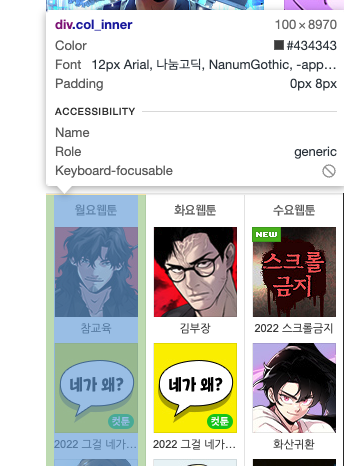

In [2]:
col_list = soup.find_all('div', {'class':'col'})

In [3]:
total_name_list = []
for data in col_list:
    name = data.find('div', {'class':'col_inner'}).find_all('a', {'class': 'title'})
    name_list = [name[a].text for a in range(len(name))]
    total_name_list.append(name_list)

In [4]:
# 행렬 바꾸기 
new_list = list(map(list, zip(*total_name_list)))

In [5]:
new_list

[['참교육', '김부장', '2022 스크롤금지', '독립일기', '외모지상주의', '2022 스크롤금지', '2022 스크롤금지'],
 ['신의 탑', '대학원 탈출일지', '화산귀환', '나노마신', '갓 오브 하이스쿨', '호랑이형님', '독립일기'],
 ['뷰티풀 군바리', '여신강림', '내 남편과 결혼해줘', '연애혁명', '나 혼자 만렙 뉴비', '조조코믹스', '싸움독학'],
 ['퀘스트지상주의', '마루는 강쥐', '전지적 독자 시점', '호랑신랑뎐', '대학원 탈출일지', '99강화나무몽둥이', '투신전생기'],
 ['윈드브레이커', '1을 줄게', '조조코믹스', '현실퀘스트', '어쩌다보니 천생연분', '취사병 전설이 되다', '입학용병'],
 ['호랑신랑뎐', '멸망 이후의 세계', '헬퍼 2 : 킬베로스', '천마육성', '광마회귀', '프리드로우', '약한영웅'],
 ['장씨세가 호위무사',
  '내가 키운 S급들',
  '비즈니스 여친',
  '회귀한 천재 헌터의 슬기로운 청소생활',
  '데드퀸',
  '여고생 드래곤',
  '이번 생도 잘 부탁해'],
 ['소녀의 세계',
  '중증외상센터 : 골든 아워',
  '튜토리얼 탑의 고인물',
  '나 혼자 네크로맨서',
  '재혼 황후',
  '은탄',
  '사형소년'],
 ['백수세끼', '신도림', '66666년 만에 환생한 흑마법사', '무사만리행', '1초', '악몽의 형상', '일타강사 백사부'],
 ['신화급 귀속 아이템을 손에 넣었다',
  '용사가 돌아왔다',
  '남주의 첫날밤을 가져버렸다',
  '누나! 나 무서워',
  '개를 낳았다',
  '망나니 소교주로 환생했다',
  '수희0(tngmlek0)'],
 ['앵무살수', '삼국지톡', '여고생 드래곤', '정글쥬스', '내과 박원장', '초인의 시대', '존망코인'],
 ['잔불의 기사', '악몽의 형상', '기묘한 만화', '노답소녀', '삼국지톡', '스터디그룹', '천하제일인'],
 ['불청객', '랜덤

In [6]:
# 데이터 프레임 생성 
df = pd.DataFrame(data=new_list, columns=['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])

In [7]:
df

,월요일,화요일,수요일,목요일,금요일,토요일,일요일
0,참교육,김부장,2022 스크롤금지,독립일기,외모지상주의,2022 스크롤금지,2022 스크롤금지
1,신의 탑,대학원 탈출일지,화산귀환,나노마신,갓 오브 하이스쿨,호랑이형님,독립일기
2,뷰티풀 군바리,여신강림,내 남편과 결혼해줘,연애혁명,나 혼자 만렙 뉴비,조조코믹스,싸움독학
3,퀘스트지상주의,마루는 강쥐,전지적 독자 시점,호랑신랑뎐,대학원 탈출일지,99강화나무몽둥이,투신전생기
4,윈드브레이커,1을 줄게,조조코믹스,현실퀘스트,어쩌다보니 천생연분,취사병 전설이 되다,입학용병
...,...,...,...,...,...,...,...
68,역주행!,미신,낙원의 이론,시에라,너의 키스씬,주욱 같은 하루,마도
69,결혼공략,NG불가,구주,로맨틱 태평수산,히트포인트,키스의 여왕,밀실 마피아 게임
70,사막에 핀 달,대신 심부름을 해다오,나의 계절,방과후 레시피,스치면 인연 스며들면 사랑,"나를 길들여 봐, 차비서",독신마법사 기숙아파트
71,헬로맨스,교환학생,하지만 너는 2D잖아,그 황제가 시곗바늘을 되돌린 사연,팬시X팬시,스트릿 워크아웃,패션쇼
